In [1]:
import numpy as np
import matplotlib.pyplot as pp;
pp.rcParams['figure.figsize'] = [10, 5]

In [2]:
def forwardeuler(f,t0,u0,T,M):
    """
    Computes an approximate solution u of a scalar ODE 

        u' = f(t,u)

    with a forward Euler method subject to u(t0) = u0.

    Parameters
    ----------

    f: The right-hand side function of (t,u).
    t0: The initial time.
    u0: The initial condition at t=t0.
    T: Endpoint of solution t-interval [t0,T]
    M: The number of equally spaced time steps.

    Returns
    -------

    t: An array of sample times.
    u: The approximate solution at the sample times.
    """

    t=np.linspace(t0,T,M+1)
    h = (T-t0)/M
    
    u = np.zeros( (M+1,) )
    u[0] = u0

    u_curr = u0
    for k in range(M):
        u_curr = u_curr + h*f(t[k],u_curr)
        u[k+1] = u_curr

    return (t,u)

In [3]:
?forwardeuler

In [4]:
?np.zeros

In [5]:
f = lambda t, u: 10*u*(1-u)

In [6]:
def f(t,u):
    return 10*u*(1-u)

In [8]:
u_exact = lambda t : 1/(1+99*np.exp(-10*t))

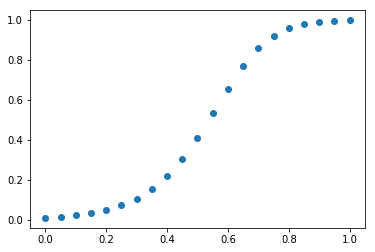

In [7]:
(t,u)=forwardeuler(f,t0=0,u0=0.01,T=1,M=20)
pp.plot(t,u,"o")

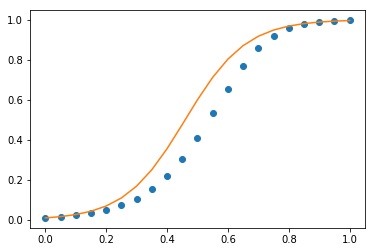

In [9]:
pp.plot(t,u,"o",t,u_exact(t))

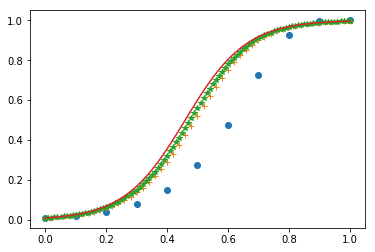

In [10]:
M_list = [10, 50, 100]
symbols = ["o","+","*"]
for (k,M) in enumerate(M_list):
    (t,u) = forwardeuler(f,t0=0,u0=0.01,T=1,M=M)
    pp.plot(t,u,symbols[k])
# Reuse last value of t for exact solution
pp.plot(t,u_exact(t))

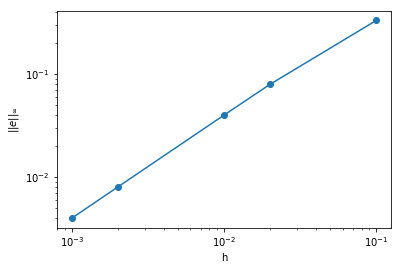

In [11]:
M_list = [10, 50, 100, 500, 1000]
err = []
for M in M_list:
    (t,u) = forwardeuler(f,t0=0,u0=0.01,T=1,M=M)
    err.append(np.linalg.norm(u_exact(t)-u,np.Inf))
err
h_list = 1.0/np.array(M_list)
pp.loglog(h_list,err,"-o")
pp.xlabel("h")
pp.ylabel(r"$||e||_{\infty}$");